**DATA AVAILABLE:**

- CC GENERAL.csv

**BUSINESS CONTEXT:**

This case requires trainees to develop a customer segmentation to define marketing strategy. The
sample dataset summarizes the usage behavior of about 9000 active credit card holders during the
last 6 months. The file is at a customer level with 18 behavioral variables. 

**Expectations from the Trainees:**

- **Advanced data preparation:** Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
    - Monthly average purchase and cash advance amount
    - Purchases by type (one-off, installments)
    - Average amount per purchase and cash advance transaction,
    - Limit usage (balance to credit limit ratio),
    - Payments to minimum payments ratio etc.
- **Advanced reporting:** Use the derived KPIs to gain insight on the customer profiles.
- **Identification of the relationships/ affinities between services.**
- **Clustering:** Apply a data reduction technique factor analysis for variable reduction technique
  and a clustering algorithm to reveal the behavioural segments of credit card holders
- **Identify cluster characterisitics of the cluster using detailed profiling.**
- **Provide the strategic insights and implementation of strategies for given set of cluster characteristics**

**DATA DICTIONARY:**

**1. CUST_ID:** Credit card holder ID.

**2. BALANCE:** Monthly average balance (based on daily balance averages).

**3. BALANCE_FREQUENCY:** Ratio of last 12 months with balance.

**4. PURCHASES:** Total purchase amount spent during last 12 months.

**5. ONEOFF_PURCHASES:** Total amount of one-off purchases.

**6. INSTALLMENTS_PURCHASES:** Total amount of installment purchases.

**7. CASH_ADVANCE:** Total cash-advance amount.

**8. PURCHASES_ FREQUENCY:** Frequency of purchases (Percent of months with at least one
purchase).

**9. ONEOFF_PURCHASES_FREQUENCY:** Frequency of one-off-purchases.

**10. PURCHASES_INSTALLMENTS_FREQUENCY:** Frequency of installment purchases.

**11. CASH_ADVANCE_ FREQUENCY:** Cash-Advance frequency.

**12. AVERAGE_PURCHASE_TRX:** Average amount per purchase transaction.

**13. CASH_ADVANCE_TRX:** Average amount per cash-advance transaction.

**14. PURCHASES_TRX:** Average amount per purchase transaction.

**15. CREDIT_LIMIT:** Credit limit.

**16. PAYMENTS:** Total payments (due amount paid by the customer to decrease their statement
balance) in the period.

**17. MINIMUM_PAYMENTS:** Total minimum payments due in the period.

**18. PRC_FULL_PAYMENT:** Percentage of months with full payment of the due statement balance.

**19. TENURE:** Number of months as a customer.

## Importing Neccessary Liberaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('CC_GENERAL.csv')

In [3]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## Checking for Null Values

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Looks like 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' have some missing/null values

### Let's fill those with their respective mean

In [5]:
df['MINIMUM_PAYMENTS'].fillna(np.mean(df['MINIMUM_PAYMENTS']), inplace=True)

In [6]:
df['CREDIT_LIMIT'].fillna(np.mean(df['CREDIT_LIMIT']), inplace=True)

In [7]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Numerical Summary

In [8]:
df.drop('CUST_ID', axis=1).describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

# Correlation Matrix

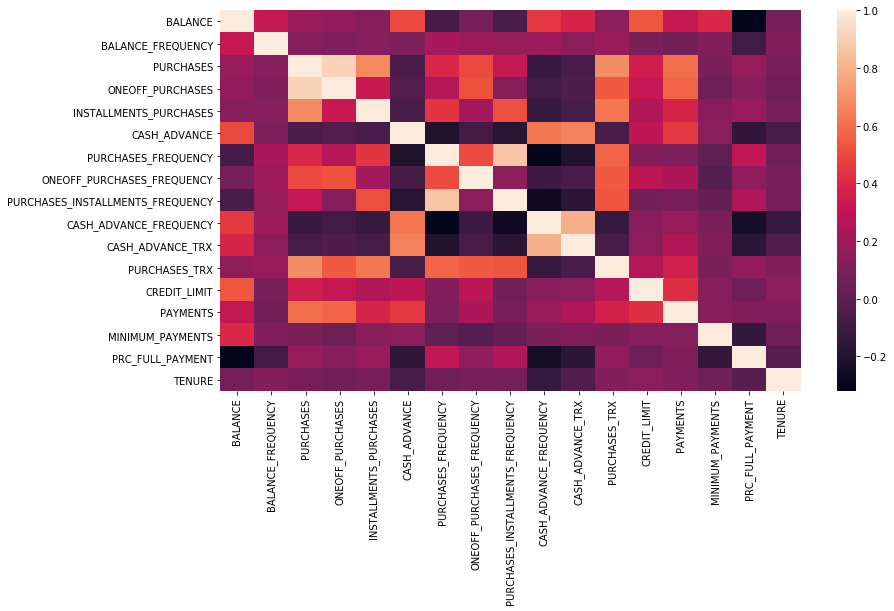

In [9]:
plt.figure(figsize=(13, 7))
sns.heatmap(df.corr())

# Outliers overview

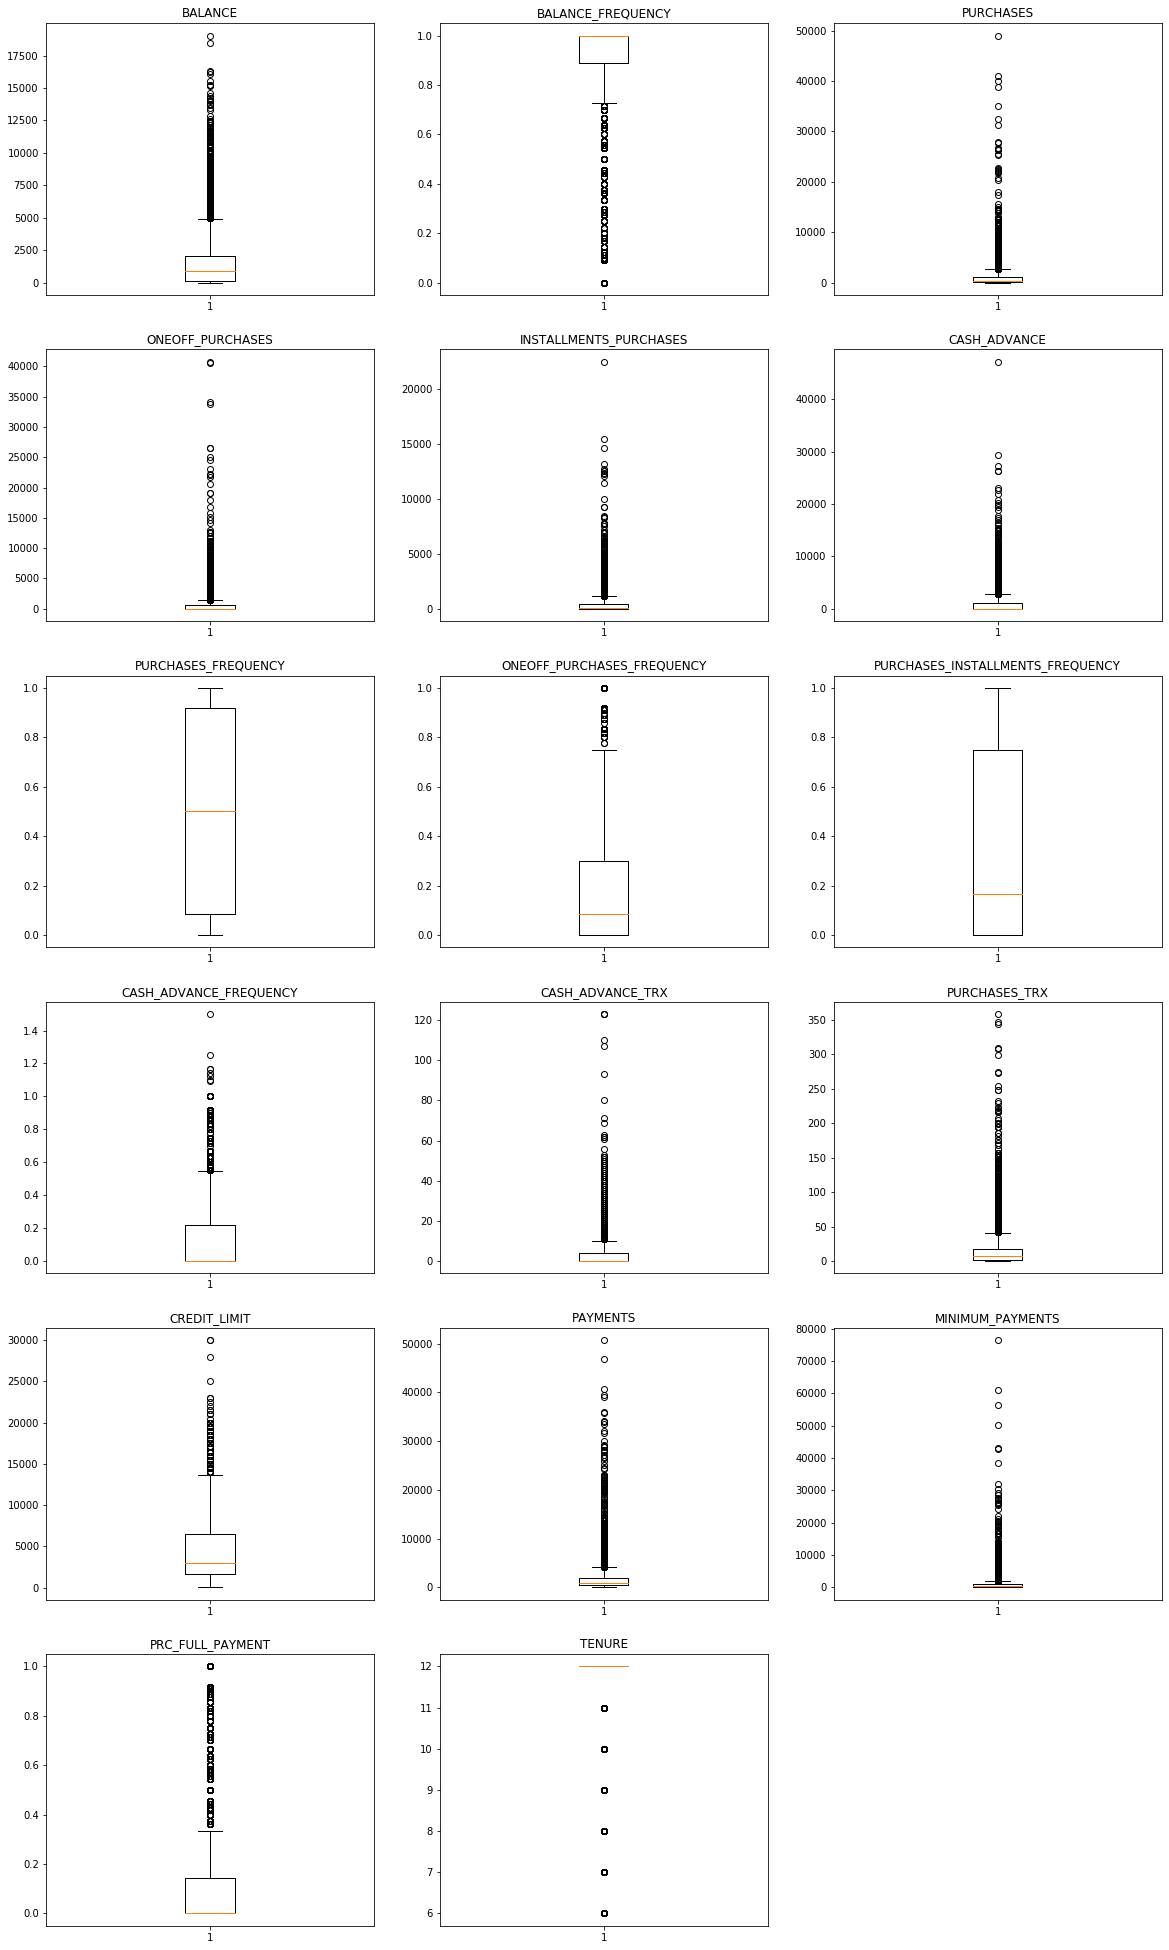

In [10]:
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(df[df.columns.to_list()[1:][i]].dropna())
    plt.title(df.columns.to_list()[1:][i])

# KPIs

## Monthly average purchase and cash advance amount

In [11]:
df['Monthly Average Purchase'] = df['PURCHASES'] / df['TENURE']
df['Monthly Average Cash Advance'] = df['CASH_ADVANCE'] / df['TENURE']

In [12]:
df.groupby('CUST_ID').sum()[['Monthly Average Purchase', 'Monthly Average Cash Advance']].head(10)

Monthly Average Purchase  Monthly Average Cash Advance
CUST_ID                                                        
C10001                   7.950000                      0.000000
C10002                   0.000000                    536.912124
C10003                  64.430833                      0.000000
C10004                 124.916667                     17.149001
C10005                   1.333333                      0.000000
C10006                 111.106667                      0.000000
C10007                 590.917500                      0.000000
C10008                  36.350000                      0.000000
C10009                  71.790833                      0.000000
C10010                 106.800000                      0.000000

## Purchases by type (one-off, installments)

In [13]:
df.groupby('CUST_ID').sum()[['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']].head(10)

ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
CUST_ID                                          
C10001               0.00                   95.40
C10002               0.00                    0.00
C10003             773.17                    0.00
C10004            1499.00                    0.00
C10005              16.00                    0.00
C10006               0.00                 1333.28
C10007            6402.63                  688.38
C10008               0.00                  436.20
C10009             661.49                  200.00
C10010            1281.60                    0.00

## Average amount per purchase and cash advance transaction

In [14]:
df.groupby('CUST_ID').mean()[['PURCHASES', 'CASH_ADVANCE']].head(10)

PURCHASES  CASH_ADVANCE
CUST_ID                         
C10001       95.40      0.000000
C10002        0.00   6442.945483
C10003      773.17      0.000000
C10004     1499.00    205.788017
C10005       16.00      0.000000
C10006     1333.28      0.000000
C10007     7091.01      0.000000
C10008      436.20      0.000000
C10009      861.49      0.000000
C10010     1281.60      0.000000

## Limit usage (balance to credit limit ratio)

In [15]:
df['Limit_Usage_Ratio'] = df['BALANCE'] / df['CREDIT_LIMIT']

In [16]:
df.groupby('CUST_ID').sum()[['Limit_Usage_Ratio']].head(10)

Limit_Usage_Ratio
CUST_ID                   
C10001            0.040901
C10002            0.457495
C10003            0.332687
C10004            0.222223
C10005            0.681429
C10006            1.005460
C10007            0.046464
C10008            0.792892
C10009            0.144989
C10010            0.013839

## Payments to minimum payments ratio

In [17]:
df['Pay_to_min_pay_Ratio'] = df['PAYMENTS'] / df['MINIMUM_PAYMENTS']

In [18]:
df.groupby('CUST_ID').sum()[['Pay_to_min_pay_Ratio']].head(10)

Pay_to_min_pay_Ratio
CUST_ID                      
C10001               1.446508
C10002               3.826241
C10003               0.991682
C10004               0.000000
C10005               2.771075
C10006               0.581601
C10007              32.081820
C10008               1.276357
C10009               2.206280
C10010              11.612605

# Advanced Reporting

## Montly Average Purchase and Cash Advance for First 10 Customers

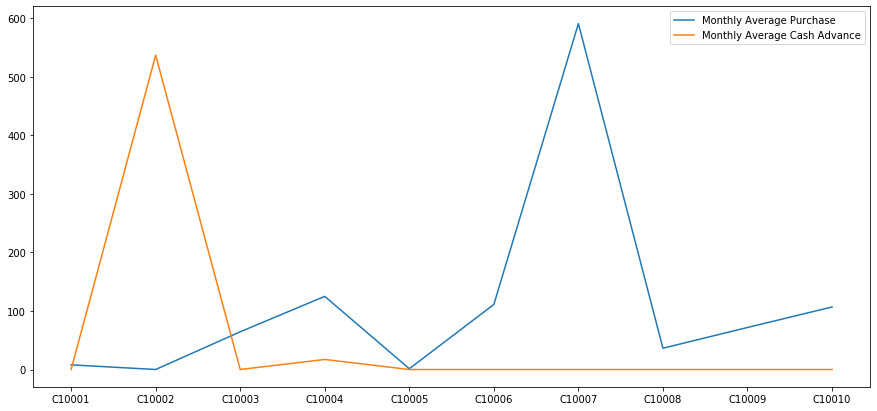

In [19]:
plt.figure(figsize=(15, 7))
plt.plot(df.groupby('CUST_ID').sum()[['Monthly Average Purchase', 'Monthly Average Cash Advance']].head(10))
plt.legend(['Monthly Average Purchase', 'Monthly Average Cash Advance'])

## One-off Purchases and Installments Purchases for first 10 customers

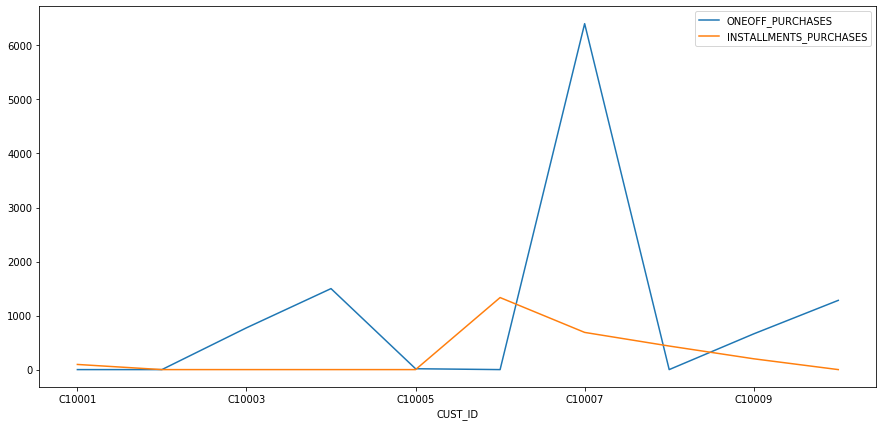

In [20]:
df.groupby('CUST_ID').sum()[['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']].head(10).plot(figsize=(15, 7))

# Kernel Density Estimation

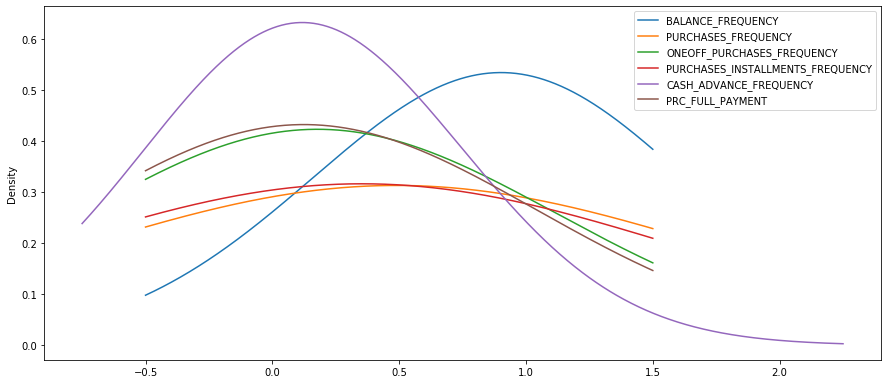

In [21]:
ax = df[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']].plot.kde(figsize=(15,6.5), bw_method=3)

## Train Test Split

### We're not including 'CUST_ID' in our training as it won't be needed

In [22]:
X = df.drop('CUST_ID', axis=1).values

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test = train_test_split(X, random_state=101, test_size=0.20)

## Scaling the variables

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc_X = StandardScaler()

In [27]:
sc_X_train = StandardScaler()

In [28]:
sc_X_test = StandardScaler()

In [29]:
X_scaled = sc_X.fit_transform(X)

In [30]:
X_train_scaled = sc_X_train.fit_transform(X_train)

In [31]:
X_test_scaled = sc_X_test.fit_transform(X_test)

In [32]:
X_train = pd.DataFrame(X_train_scaled, columns=df.drop('CUST_ID', axis=1).columns)
X_test = pd.DataFrame(X_test_scaled, columns=df.drop('CUST_ID', axis=1).columns)

In [33]:
df_scaled = pd.DataFrame(X_scaled, columns=df.drop('CUST_ID', axis=1).columns)

In [34]:
df_scaled

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  ...  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0                  -0.675349  ...      -0.511333     -0.960433 -0.528979   
1                   0.573963  ...      -0.591796      0.688639  0.818642   
2                  -0.675349  ...      -0.109020      0.826062 -0.383805   
3                  -0.258913  ...      -0.551565      0.826062 -0.598688   
4                  -0.675349  ...      -0.551565     -0.905464 -0.364368   
...                      ...  ...            ...           ...       ...   
8945               -0.675349  ...      -0.350408     -0.960433 -0.486217   
8946               -0.675349  ...      -0.350408     -0.960433 -0.503396   
8947               -0.675349  ...      -0.390639     -0.960433 -0.570615   
8948                0.157527  ...      -0.591796     -1.097856 -0.580536   
8949                0.990398  ...       0.333524     -0.905464 -0.576869   

      MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  Monthly Average Purchase  \
0        -3.109675e-01         -0.525551  0.360680                 -0.433384   
1         8.931021e-02          0.234227  0.360680                 -0.477428   
2        -1.016632e-01         -0.525551  0.360680                 -0.120468   
3        -5.366135e-16         -0.525551  0.360680                  0.214636   
4        -2.657913e-01         -0.525551  0.360680                 -0.470041   
...                ...               ...       ...                       ...   
8945     -3.498541e-01          1.183951 -4.122768                 -0.208617   
8946     -5.366

## Dimension Reduction

# Principal Component Analysis

In [35]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [36]:
km = KMeans(n_clusters=8, random_state=101)
km.fit(X_train)
km.labels_

array([2, 7, 0, ..., 3, 2, 5])

## Normalizing the training data

In [37]:
from sklearn.preprocessing import normalize

In [38]:
X_train_norm = normalize(X_train)

In [39]:
X_train_norm.shape

(7160, 21)

## PCA with 2 components

In [40]:
pca = PCA(n_components=2, random_state=101)
pca.fit(X_train_norm)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=101,
    svd_solver='auto', tol=0.0, whiten=False)

In [41]:
pca2d = pca.fit_transform(X_train_norm)

In [42]:
print("original shape:   ", X_train_norm.shape)
print("transformed shape:", pca2d.shape)

original shape:    (7160, 21)
transformed shape: (7160, 2)


In [43]:
df_pca2d = pd.DataFrame(pca2d) 
df_pca2d.columns = ['A1', 'A2']
df_pca2d.head()

A1        A2
0  0.556864  0.592115
1 -0.680166  0.110145
2 -0.063699 -0.627131
3  0.145659  0.717715
4 -0.114450 -0.374546

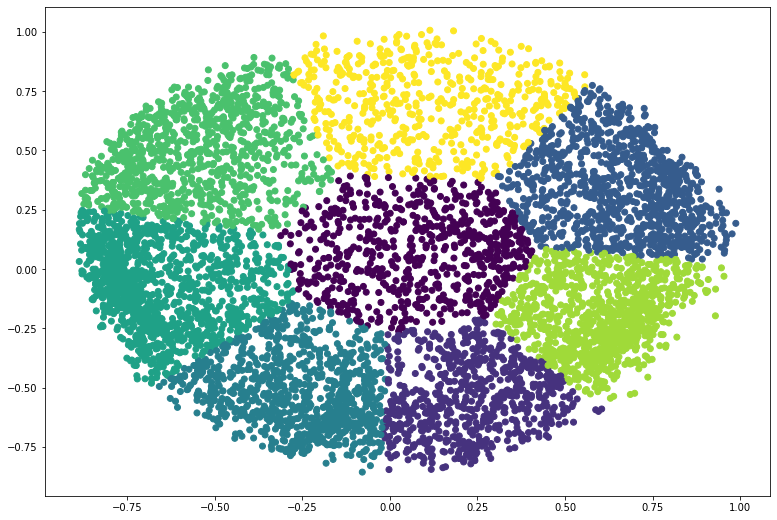

In [44]:
plt.figure(figsize=(13, 9))
plt.scatter(df_pca2d['A1'], df_pca2d['A2'], c = KMeans(n_clusters=8, random_state=101).fit_predict(df_pca2d))

In [45]:
pca.explained_variance_

array([0.26949289, 0.18314468])

## Explained Variance Ratio

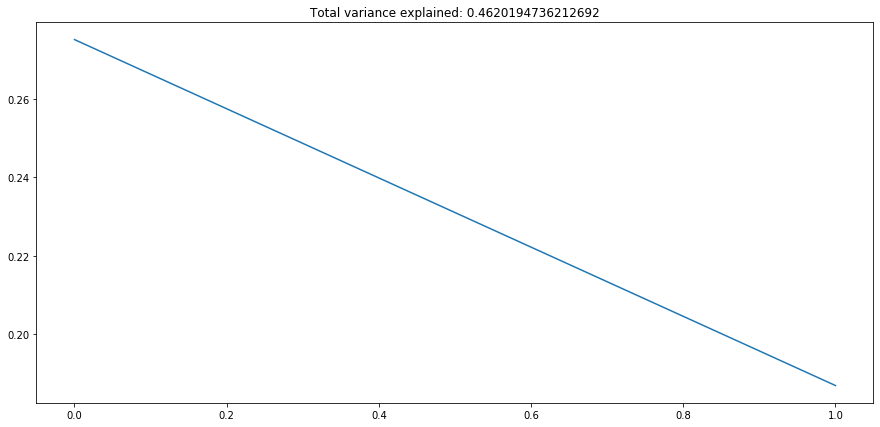

In [46]:
plt.figure(figsize = (15,7))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

## PCA with 3 components

In [47]:
pca = PCA(n_components=3, random_state=101)
pca.fit(X_train_norm)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=101,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
pca3d = pca.fit_transform(X_train_norm)

In [49]:
print("original shape:   ", X_train_norm.shape)
print("transformed shape:", pca3d.shape)

original shape:    (7160, 21)
transformed shape: (7160, 3)


In [50]:
df_pca3d = pd.DataFrame(pca3d) 
df_pca3d.columns = ['A1', 'A2', 'A3']
df_pca3d.head()

A1        A2        A3
0  0.556864  0.592115 -0.204739
1 -0.680166  0.110145  0.144681
2 -0.063699 -0.627131 -0.380852
3  0.145659  0.717715 -0.069486
4 -0.114450 -0.374546  0.629306

In [51]:
import plotly.express as px

In [52]:
fig = px.scatter_3d(df_pca3d, x=df_pca3d['A1'], y= df_pca3d['A2'], z=df_pca3d['A3'], color=km.labels_)
fig.show()

In [53]:
pca.explained_variance_

array([0.26949289, 0.18314468, 0.11877607])

## Explained Variance Ratio

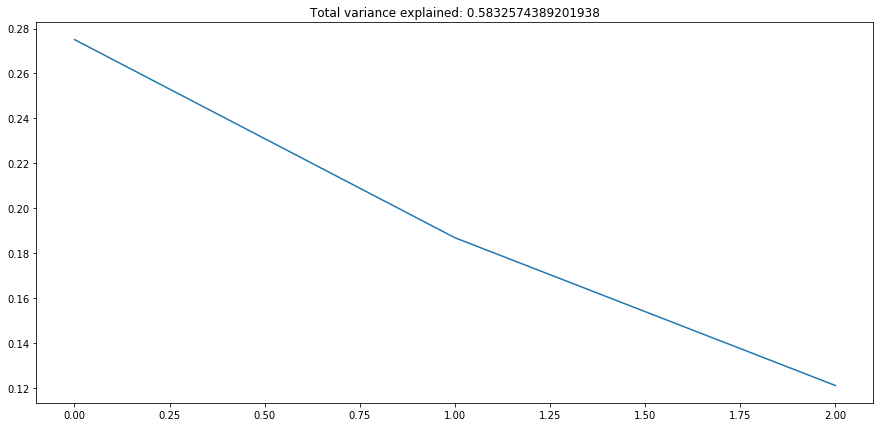

In [54]:
plt.figure(figsize = (15,7))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

# Clustering

In [55]:
from sklearn.cluster import KMeans

## Elbow Method

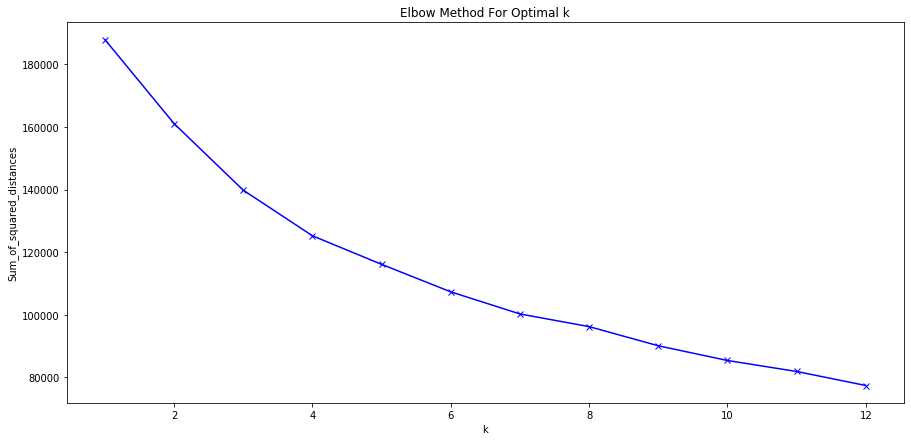

In [56]:
Sum_of_squared_distances = []
K = range(1,13)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(15, 7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### It seems like, after 8, the declivity of line doesn't vary much. So, let's select 8 to be the optimum number of clusters.

In [57]:
kmeans = KMeans(n_clusters=8, random_state=5)

In [58]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [59]:
predictions = kmeans.predict(X_test)

In [60]:
test_inverse = sc_X_test.inverse_transform(X_test)

In [61]:
X_test = pd.DataFrame(test_inverse, columns=X_test.columns)

## Adding predictions to our Test set

In [62]:
X_test['Cluster'] = predictions

In [63]:
X_test

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     6882.811896           1.000000    2480.63           2038.24   
1     1427.422970           1.000000      61.00              0.00   
2      765.146736           0.500000       0.00              0.00   
3     1106.557102           1.000000    1342.86           1149.91   
4     2757.097566           1.000000    1533.04            384.04   
...           ...                ...        ...               ...   
1785  1873.619910           1.000000     396.26            396.26   
1786  1552.535280           1.000000    2072.43           1518.40   
1787   738.992204           1.000000       0.00              0.00   
1788   703.368382           1.000000      64.00              0.00   
1789    81.860834           0.909091     710.09            392.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     442.39  1.657437e+03             0.916667   
1                      61.00  4.327398e+03             0.166667   
2                       0.00  2.907521e+03             0.000000   
3                     192.95  3.249314e+03             0.333333   
4                    1149.00  6.867908e+02             0.500000   
...                      ...           ...                  ...   
1785                    0.00  2.025438e+03             0.571429   
1786                  554.03  1.136868e-13             0.833333   
1787                    0.00  1.862828e+02             0.000000   
1788                   64.00  1.136868e-13             0.500000   
1789                  318.09  1.136868e-13             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.833333                          0.583333   
1                       0.000000                          0.083333   
2                       0.000000                          0.000000   
3                       0.250000                          0.083333   
4                       0.083333                          0.416667   
...                          ...                               ...   
1785                    0.571429                          0.000000   
1786                    0.500000                          0.500000   
1787                    0.000000                          0.000000   
1788                    0.000000                          0.416667   
1789                    0.166667                          0.416667   

      CASH_ADVANCE_FREQUENCY  ...  CREDIT_LIMIT     PAYMENTS  \
0                   0.500000  ...        8500.0  1876.060624   
1                   0.583333  ...        9000.0  5907.105978   
2                   0.375000  ...        2500.0  1852.897173   
3                   0.250000  ...        6500.0  4421.574277   
4                   0.166667  ...        3000.0   767.851514   
...                      ...  ...           ...          ...   
1785                0.571429  ...        2500.0   353.512837   
1786                0.000000  ...        7000.0  2522.068213   
1787                0.083333  ...        2000.0   386.913089   
1788                0.000000  ...        2550.0   179.083715   
1789                0.000000  ...        7500.0   684.774819   

      MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Monthly Average Purchase  \
0          2543.670089     -2.775558e-17    12.0                206.719167   
1           389.155496      1.666670e-01    12.0                  5.083333   
2           514.143157     -2.775558e-17     8.0                  0.000000   
3           265.127884     -2.775558e-17    12.0                111.905000   
4          8608.532910     -2.775558e-17    12.0                127.753333   
...                ...               ...     ...                       ...   
1785        384.161979     -2.775558e-17     7.0                 56.608571   
1786        389.675365     -2.775558e-17    12.0                172.702500   
1787        255.052406     -2.775558e-17    12.0                

# Train Summary

In [64]:
train_summary = X_test.groupby(by='Cluster').mean()
train_summary = train_summary[['BALANCE', 'PURCHASES', 
                               'PURCHASES_FREQUENCY','CREDIT_LIMIT', 
                               'ONEOFF_PURCHASES_FREQUENCY', 
                              'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT', 
                               'PAYMENTS']]

In [65]:
train_summary

BALANCE     PURCHASES  PURCHASES_FREQUENCY  CREDIT_LIMIT  \
Cluster                                                                 
0        1794.584244    220.759929             0.132549   3330.124777   
1        1394.368458   1864.902705             0.833525   6024.795082   
2         756.756954    839.642541             0.876128   3505.529412   
3        2542.755188  28965.920000             0.791667  16500.000000   
4        4930.775276    497.500286             0.292901   7716.571429   
5        3336.855413   5731.711064             0.963491   8873.936170   
6         109.567499    314.385524             0.258281   3841.066434   
7           8.640998      0.000000             0.000000   6000.000000   

         ONEOFF_PURCHASES_FREQUENCY  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Cluster                                                                   
0                          0.078210        965.310771          0.016891   
1                          0.703808        500.309632          0.245808   
2                          0.071373        811.802952          0.232366   
3                          0.791667        781.347452          0.687500   
4                          0.137153       1724.838741          0.048328   
5                          0.685123       2496.660105          0.276889   
6                          0.076700        260.198617          0.206102   
7                          0.000000          5.045387          0.500000   

             PAYMENTS  
Cluster                
0          986.175444  
1         1850.712003  
2          928.931493  
3        34042.790250  
4         3920.844818  
5         5585.279464  
6          829.816832  
7        11267.694780

# Average of 'Monthly Average Purchase' and 'Monthly Average Cash Advance' per cluster

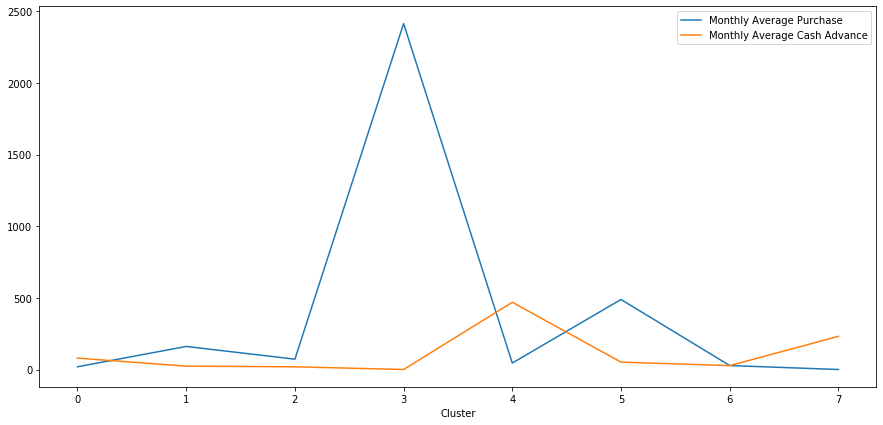

In [66]:
X_test.groupby('Cluster').mean()[['Monthly Average Purchase', 'Monthly Average Cash Advance']].plot(figsize=(15, 7))

# Train Summary Bar Graph

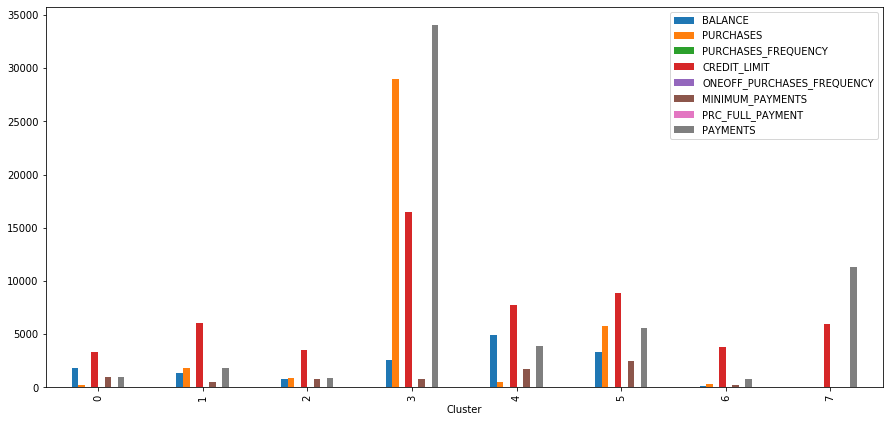

In [67]:
train_summary.plot(figsize=(15, 7), kind='bar')

**By looking at the training summary, it's safe to say that that customers belonging to cluster 3, by average, spend more as compared to others. We can conclude that these customers are infact high valued and could be marketed to differently.**

## So, to summarize our clusters one-by-one
- **Cluster 0:** This group of customers has low purchases with purchase frequency close to none.
- **Cluster 1:** This group of customers has almost same amount of purchases and payments with higher credit limit.
- **Cluster 2:** These customers have almost same amount of Minimum Payments and Payments with relatively high credit limit.
- **Cluster 3:** This group of customers has the highest amount of purchases, payments, credit limit, and one-off purchases frequency.
- **Cluster 4:** This group of customers has the highest amount of balance.
- **Cluster 5:** This group of customers has the second highest balance and credit limit with the highest minimum payments and purchase frequencies.
- **Cluster 6:** This group of customers has the lowest amount of purchases and payments.
- **Cluster 7:** This group of customers has no purchases but high credit limit.